In [1]:
from PIL import Image
import numpy as np

In [2]:

import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data=ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.5,1.5],
    shear_range=0.2,
    fill_mode="nearest",
    rescale=1./255,
    validation_split=0.4
)
# data=ImageDataGenerator(rescale=1./255)

training=data.flow_from_directory(
    r"C:\Users\Arun\Downloads\archive (1)\raw-img",
    target_size=(64,64),
    batch_size=32,
    class_mode="categorical",
    subset="training",
    seed=42
)
validation=data.flow_from_directory(
    r"C:\Users\Arun\Downloads\archive (1)\raw-img",
    target_size=(64,64),
    batch_size=32,
    class_mode="categorical",
    subset="validation",
    seed=42
)


Found 15711 images belonging to 10 classes.
Found 10468 images belonging to 10 classes.


In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Dropout,BatchNormalization,MaxPooling2D

In [5]:
import tensorflow as tf

In [6]:

model=Sequential()

model.add(Conv2D(128,kernel_size=(5,5),input_shape=(64,64,3),padding="same",activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=(2,2),padding="same",activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(10,activation="softmax"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       9728      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 128)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                        

In [8]:

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
calllback=EarlyStopping(
    monitor="val_loss",
    patience=5,
    mode="auto",
    verbose=1,
    restore_best_weights=False
)

: 

In [ ]:
hist=model.fit(training,epochs=500,validation_data=validation,callbacks=calllback)

Epoch 1/500


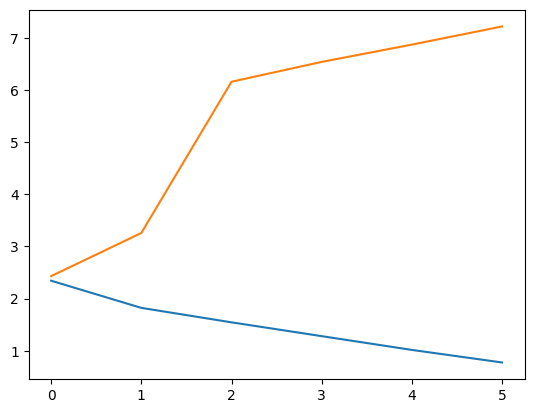

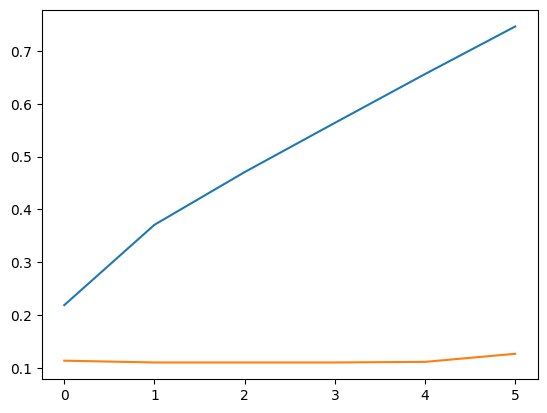

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.show()
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.show()

In [ ]:
newimg=Image.open(r"C:\Users\Arun\Downloads\monarchbutterflybush-56cb3a725f9b5879cc542678.jpg")
newimg=newimg.resize(64,64,3)
newimg=np.array(newimg)


ValueError: Unknown resampling filter (64). Use Image.Resampling.NEAREST (0), Image.Resampling.LANCZOS (1), Image.Resampling.BILINEAR (2), Image.Resampling.BICUBIC (3), Image.Resampling.BOX (4) or Image.Resampling.HAMMING (5)

In [ ]:
pred=model.predict(newimg)